In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os, sys, time
import tensorflow as tf
from tensorflow import keras

## **加载加利福利亚数据集**

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
import pprint # pprint在format上优于print
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [5]:
from sklearn.model_selection import train_test_split
X_train_all, X_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_val_scaled = std_scaler.transform(X_val)
X_test_scaled = std_scaler.transform(X_test)

## **模型创建**

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='Adam')

callbacks = [keras.callbacks.EarlyStopping(min_delta=1e-3, patience=5),]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train_scaled, y_train, batch_size=128, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 109us/sample - loss: 2.1960 - val_loss: 0.9187
Epoch 2/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.8088 - val_loss: 0.6487
Epoch 3/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6312 - val_loss: 0.5380
Epoch 4/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5317 - val_loss: 0.4728
Epoch 5/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4715 - val_loss: 0.4365
Epoch 6/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4409 - val_loss: 0.4123
Epoch 7/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4211 - val_loss: 0.3990
Epoch 8/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4081 - val_loss: 0.3900
Epoch 9/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4000 - val_

In [11]:
def plot_learing_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5)) 
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

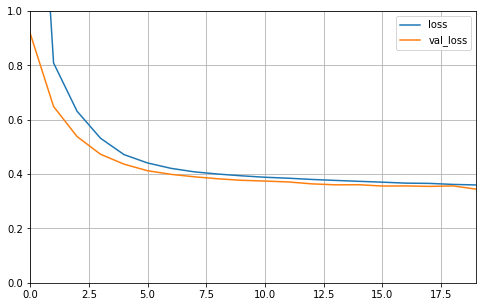

In [12]:
plot_learing_curve(history)